<a href="https://colab.research.google.com/github/tashir0605/RNN/blob/main/Intro%20to%20RNN/integer_encoding_simplernn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np

In [8]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

just suppose you have trained your mode on the data that is docs, so at the time of testing it could happen that that if you any new word that is not present while training of the data so oov replaces that word with word "nothing"


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')



https://docs.google.com/document/d/1bvuQzlqpheo8j8g9tk_K-1cwrlW4QSeBXgqNZgo7dUI/edit?usp=drivesdk

Tokenizer do certain thing like, word by word alag krdega that .split() works it generates indexes for the words in vocabulary, capital to small letters

In [11]:
tokenizer.fit_on_texts(docs)

In [12]:
tokenizer.word_index

{'<nothing>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [13]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

no of sentences in the doc

In [14]:
tokenizer.document_count

10

In [16]:
sequences=tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [17]:
from keras.utils import pad_sequences

Padding= post menaing the zeroes will be added in the last

In [18]:
sequences = pad_sequences(sequences,padding='post')

In [19]:
sequences

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]], dtype=int32)

In [20]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [21]:
(X_train,y_train),(X_tets,y_test)=imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


this data is already tokenize

In [22]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [30]:
r=len(X_train[0])
s=len(X_train[1])
t=len(X_train[2])
print(r)
print(s)
print(t)

218
189
141


As we can thw length of each review is not equal therefore we will do padding to make the equal size vector

In [31]:
X_train=pad_sequences(X_train,padding='post')
X_tets=pad_sequences(X_tets,padding='post')

In [32]:
X_train.shape

(25000, 2494)

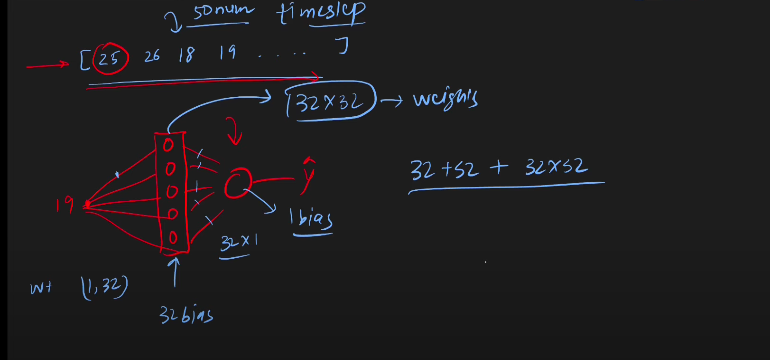

What Does **return_sequences=False **Mean?
By default, RNNs process sequential data, meaning they take input step by step and produce a sequence of hidden states.


* The return_sequences parameter controls whether the entire sequence of outputs from all time steps is returned or only the last output.


* If **return_sequences=False (default)**
Only the last output (final hidden state) is returned.
This is useful when we need a single output (e.g., classification tasks).


* If **return_sequences=True**
The RNN returns an output for each time step.
This is useful when we need the entire sequence of outputs, such as in sequence-to-sequence models (e.g., machine translation, text generation).


In [37]:
model=Sequential()

# input_shape should be passed as a tuple
model.add(SimpleRNN(32,input_shape=(2494,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss='binary_crossentropy',optimizer='adam' , metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_data=(X_tets,y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 323s 411ms/step - accuracy: 0.4981 - loss: 0.6952 - val_accuracy: 0.5064 - val_loss: 0.6932
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 325s 415ms/step - accuracy: 0.4923 - loss: 0.6946 - val_accuracy: 0.4991 - val_loss: 0.6946
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 417ms/step - accuracy: 0.5063 - loss: 0.6953 - val_accuracy: 0.4974 - val_loss: 0.6952
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 418ms/step - accuracy: 0.5056 - loss: 0.6942 - val_accuracy: 0.4999 - val_loss: 0.6944
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 381s 417ms/step - accuracy: 0.5016 - loss: 0.6942 - val_accuracy: 0.4936 - val_loss: 0.6945
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 388s 426ms/step - accuracy: 0.5015 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 376s 418ms/step - accuracy: 0.4956 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 419ms/step - accuracy: 0.4969 -